<a href="https://colab.research.google.com/github/Asad-Afridi/Digital-Image-Processing/blob/main/DIP_CH_2_DIGITAL_IMAGE_FUNDAMENTALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Spatial Resolution**
The following is the original image having 3692 x 2812 with 1250 dpi

In [ ]:
!pip install opencv-python
!pip install Pillow
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
original_image = cv2.imread("/content/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif")


3


Now reducing the DPI from 1250 to 72

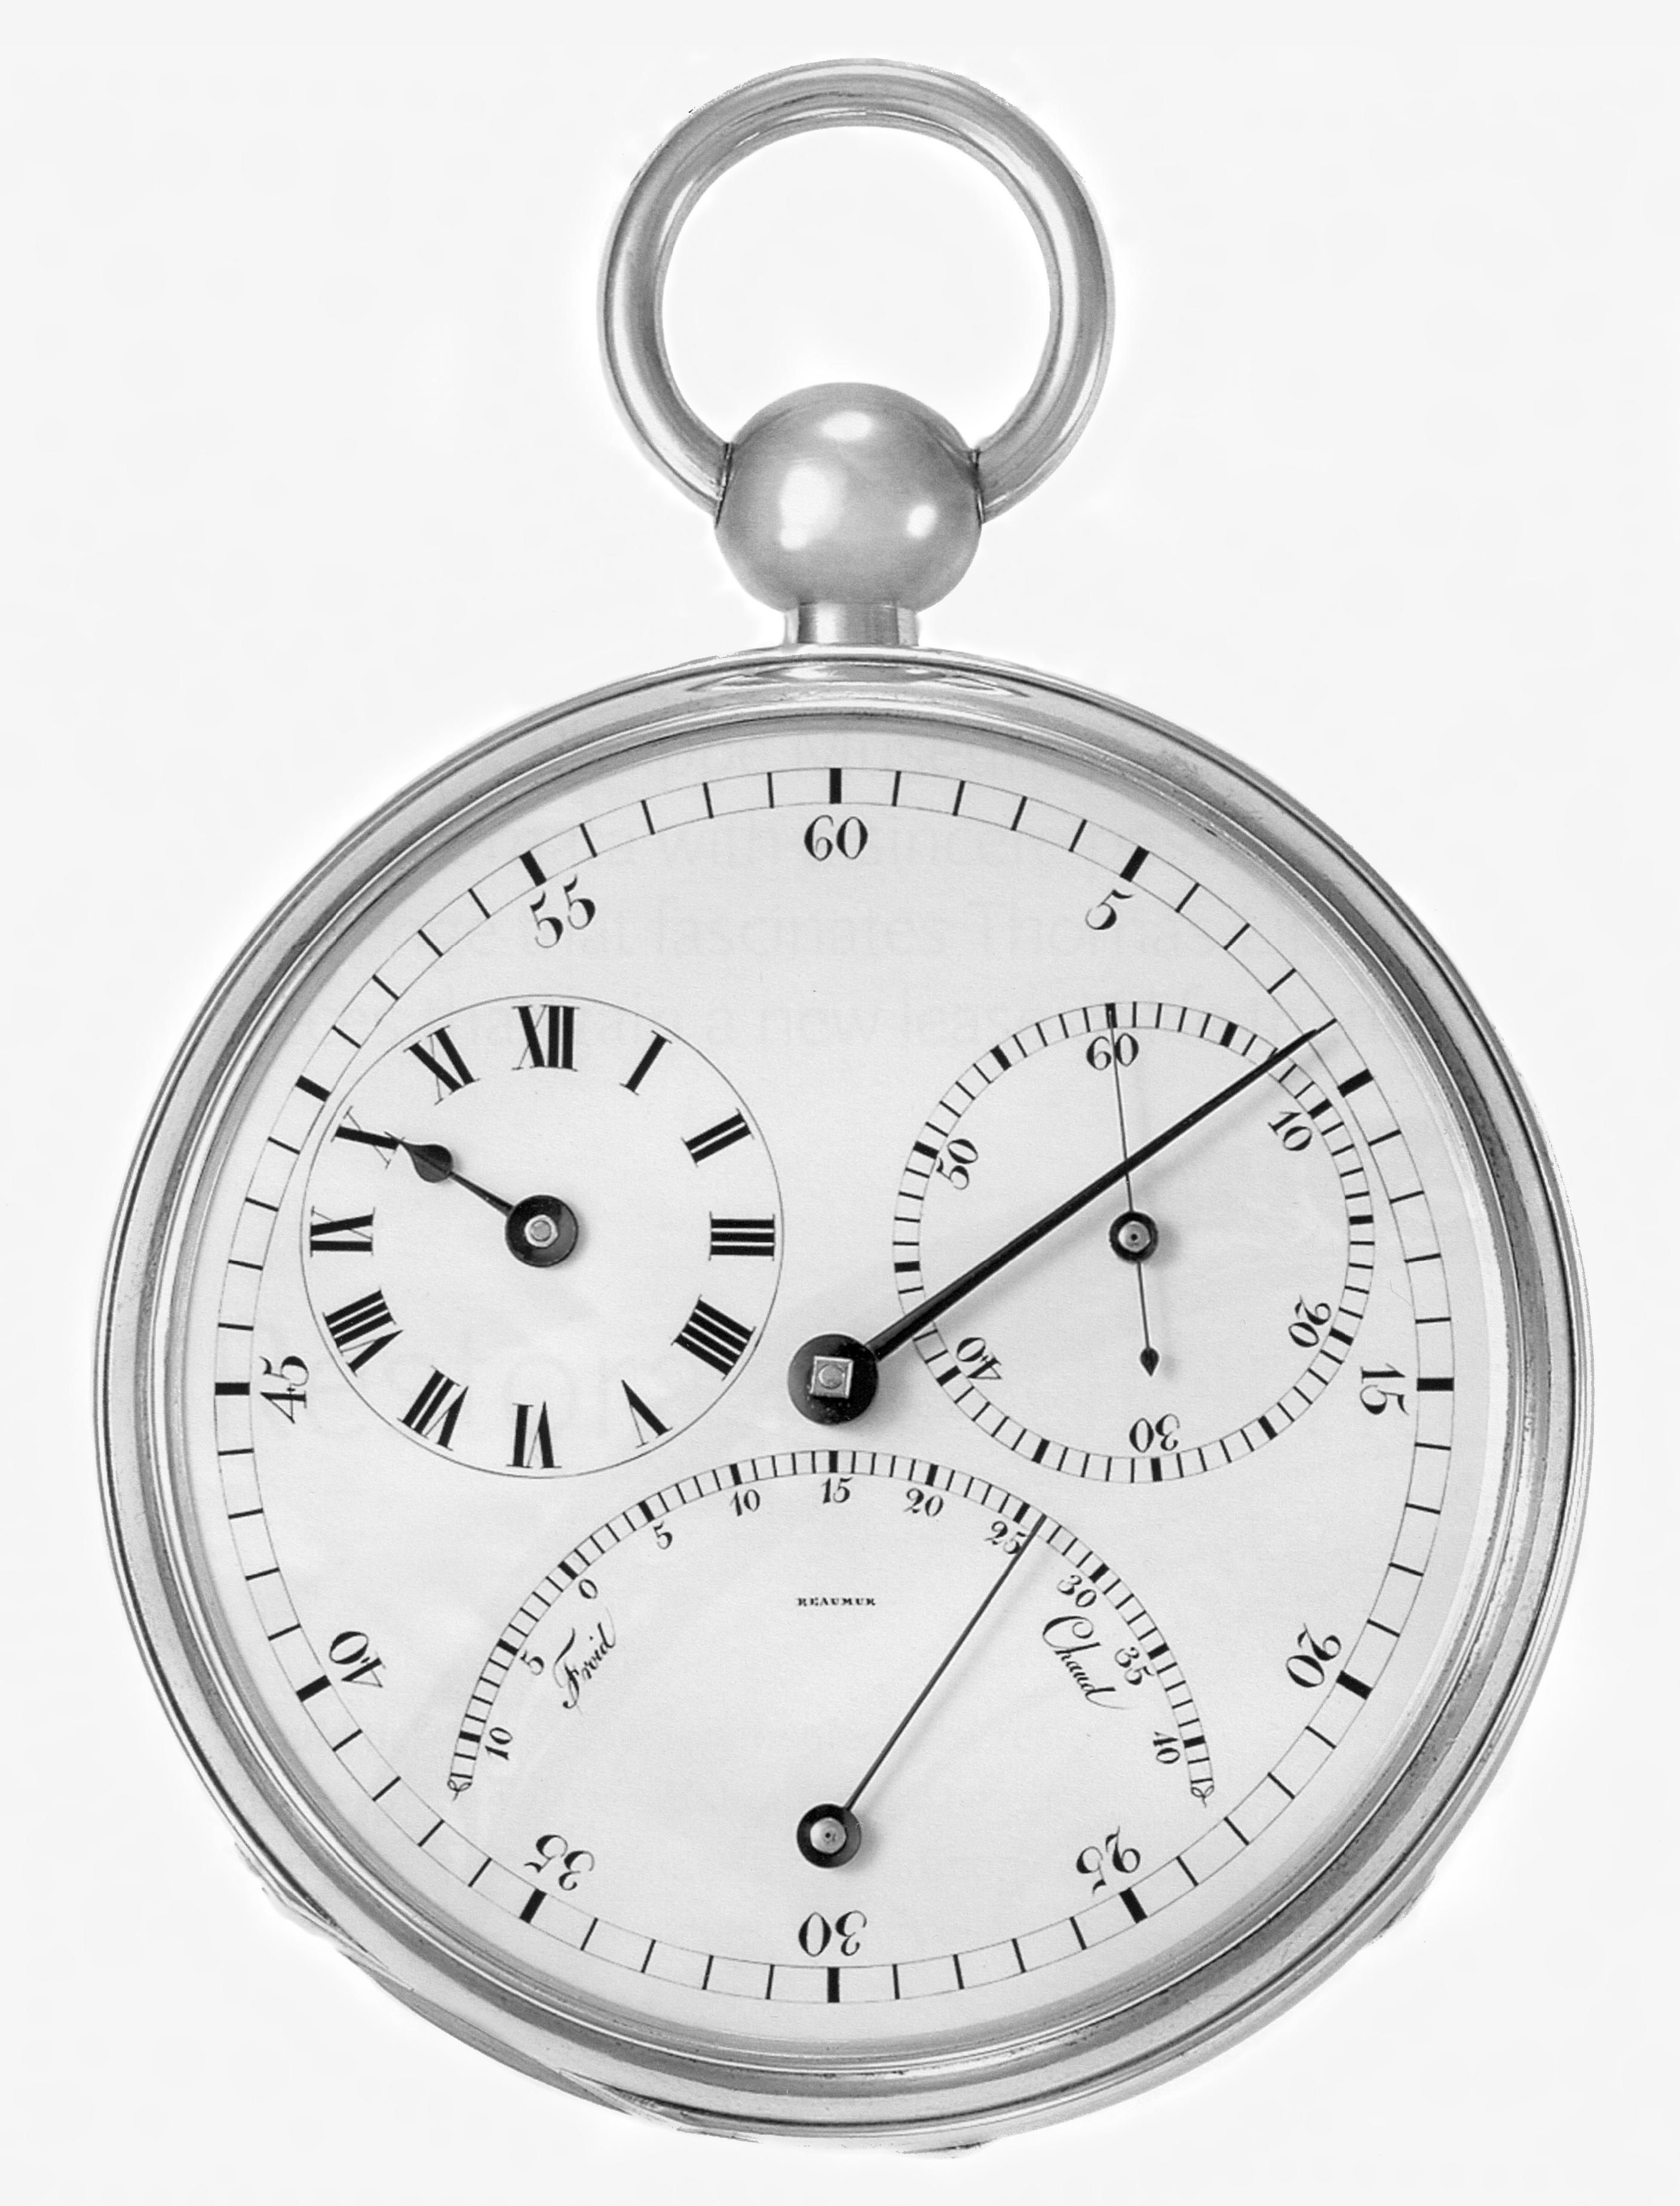

In [ ]:
pil_image = Image.fromarray(original_image)
new_dpi = (72,72)
pil_image.info['dpi'] = new_dpi
pil_image.save('300dpi.jpg')
image = cv2.imread('/content/300dpi.jpg')
cv2_imshow(image)

As I have changed the Dpi of the original image from 1250 to 72 dpi but it looks the same. why? its because changing the dpi of the image doesn't show any effect as you veiwing the image through a screen. But if you will print the image on paper then you will see the resolution of the image which will be worse than the original one.

Its mean the if you want to change the spatial resolution of an image and want to see the effect of reducing the spatial resolution. You will need to reduce the number of rows and columns which are actually pixels.

Lets reduce the 3692 x 2812 pixels image to 2136 x 2140.

In [ ]:
new_width = 2136
new_height =  2140
print(new_width) # 1846
print(new_height) # 1406
resized_image = cv2.resize(original_image, (new_width, new_height))
#cv2_imshow(resized_image)

2136
2140


Now reduce the 2136 x 2140 pixels image to its half

In [ ]:
new_width = resized_image.shape[0] // 2
new_height = resized_image.shape[1] // 2
print(new_width) # 1070
print(new_height) # 1068
resized_image = cv2.resize(resized_image, (new_width, new_height))
#cv2_imshow(resized_image)

534
535


No reduse the 1070 x 1068 pixels image to half

1070
1068


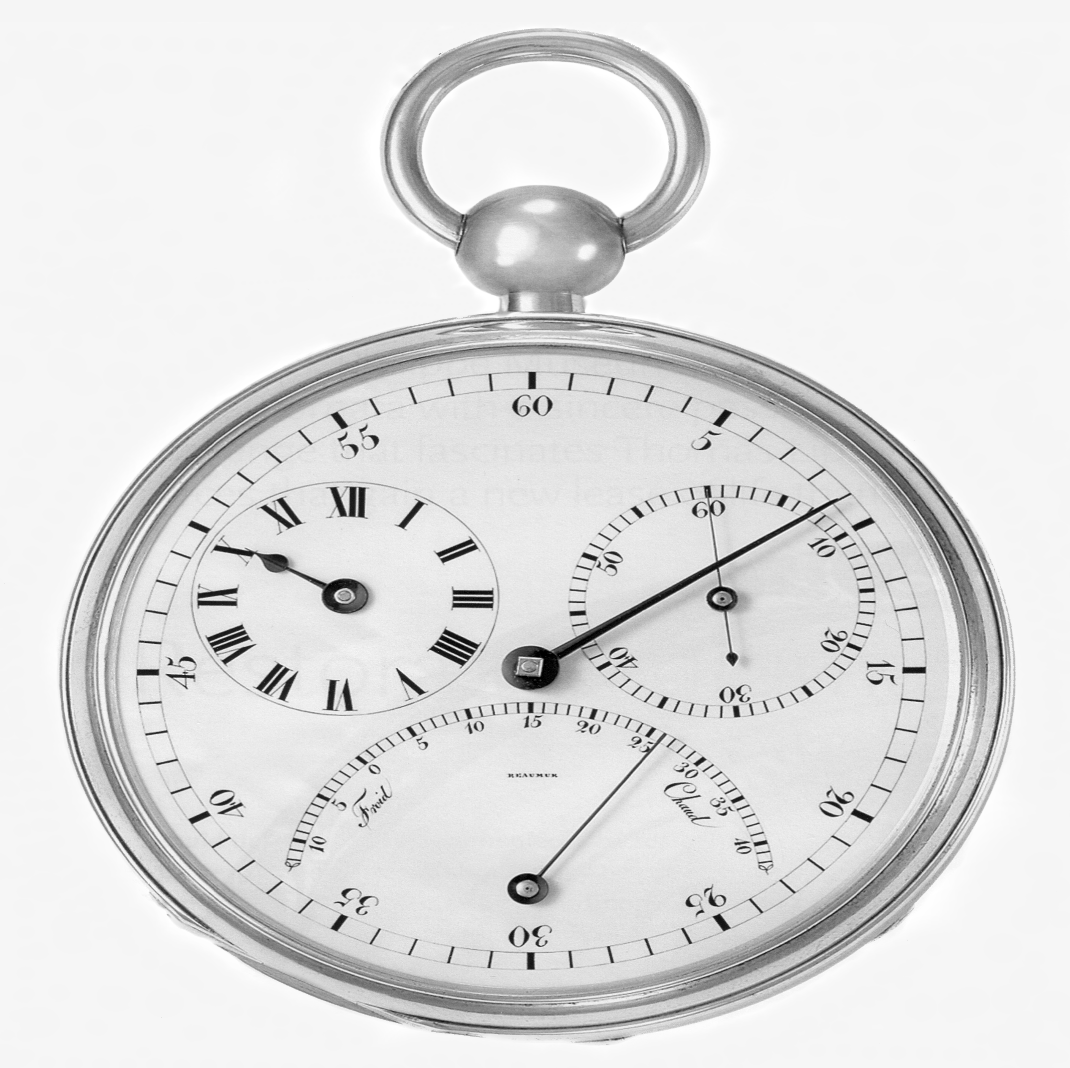

In [ ]:
new_width = resized_image.shape[0] // 2
new_height = resized_image.shape[1] // 2
print(new_width) # 534
print(new_height) # 535
resized_image = cv2.resize(resized_image, (new_width, new_height))
cv2_imshow(resized_image)

Now if you look closely at the 534 x 535 pixel image, there is a slight degradation in the seconds marker at 60.

Now lets reduce the 534 x 535 pixels image to half of it.

267
267


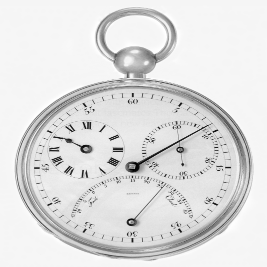

In [ ]:
new_width = resized_image.shape[0]  // 2
new_height = resized_image.shape[1]  // 2
print(new_width) # 267
print(new_height) # 267
resized_image = cv2.resize(resized_image, (new_width, new_height))
cv2_imshow(resized_image)

Now in 267 x 267 pixel image the border the markers are degraded with numbers slghtly desgraeded.

Now also reduce the 267 x 267 pixels image to its half

133
267


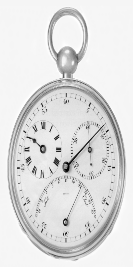

In [ ]:
new_width = resized_image.shape[0] // 2
new_heigth = resized_image.shape[1] // 2
print(new_width) # 133
print(new_height) # 267
resized_image = cv2.resize(resized_image, (new_width, new_height))
cv2_imshow(resized_image)

As we see in the above section that the image at the 133 x 267 are almost degraded. So we conclude that when we reduce the columns and rows it means that we are reducing the spatial resolution of the image means that the image loose its quality.

#**Intensity Resolution**
The original image intensity resolution is 256 mean its an 8-bits image.

In [ ]:
original_image = cv2.imread('/content/Fig0221(a)(ctskull-256).tif')
cv2_imshow(original_image)
print(np.max(original_image))

AttributeError: ignored

Now reduce the intensity resolution to 2^7 = 128

In [ ]:
threshold = original_image > 128
Threshold = original_image < 128
original_image[threshold] = 255
original_image[Threshold] = 0
cv2_imshow(original_image)

#**Image Interpolation**
1. Nearest Neighbor Interpolation
      
      We will apply Nearest Neighbor Interpolation but first do spatial resolution to reduce the resolution of the image and enlarge it by nearest neighbors interpolation.

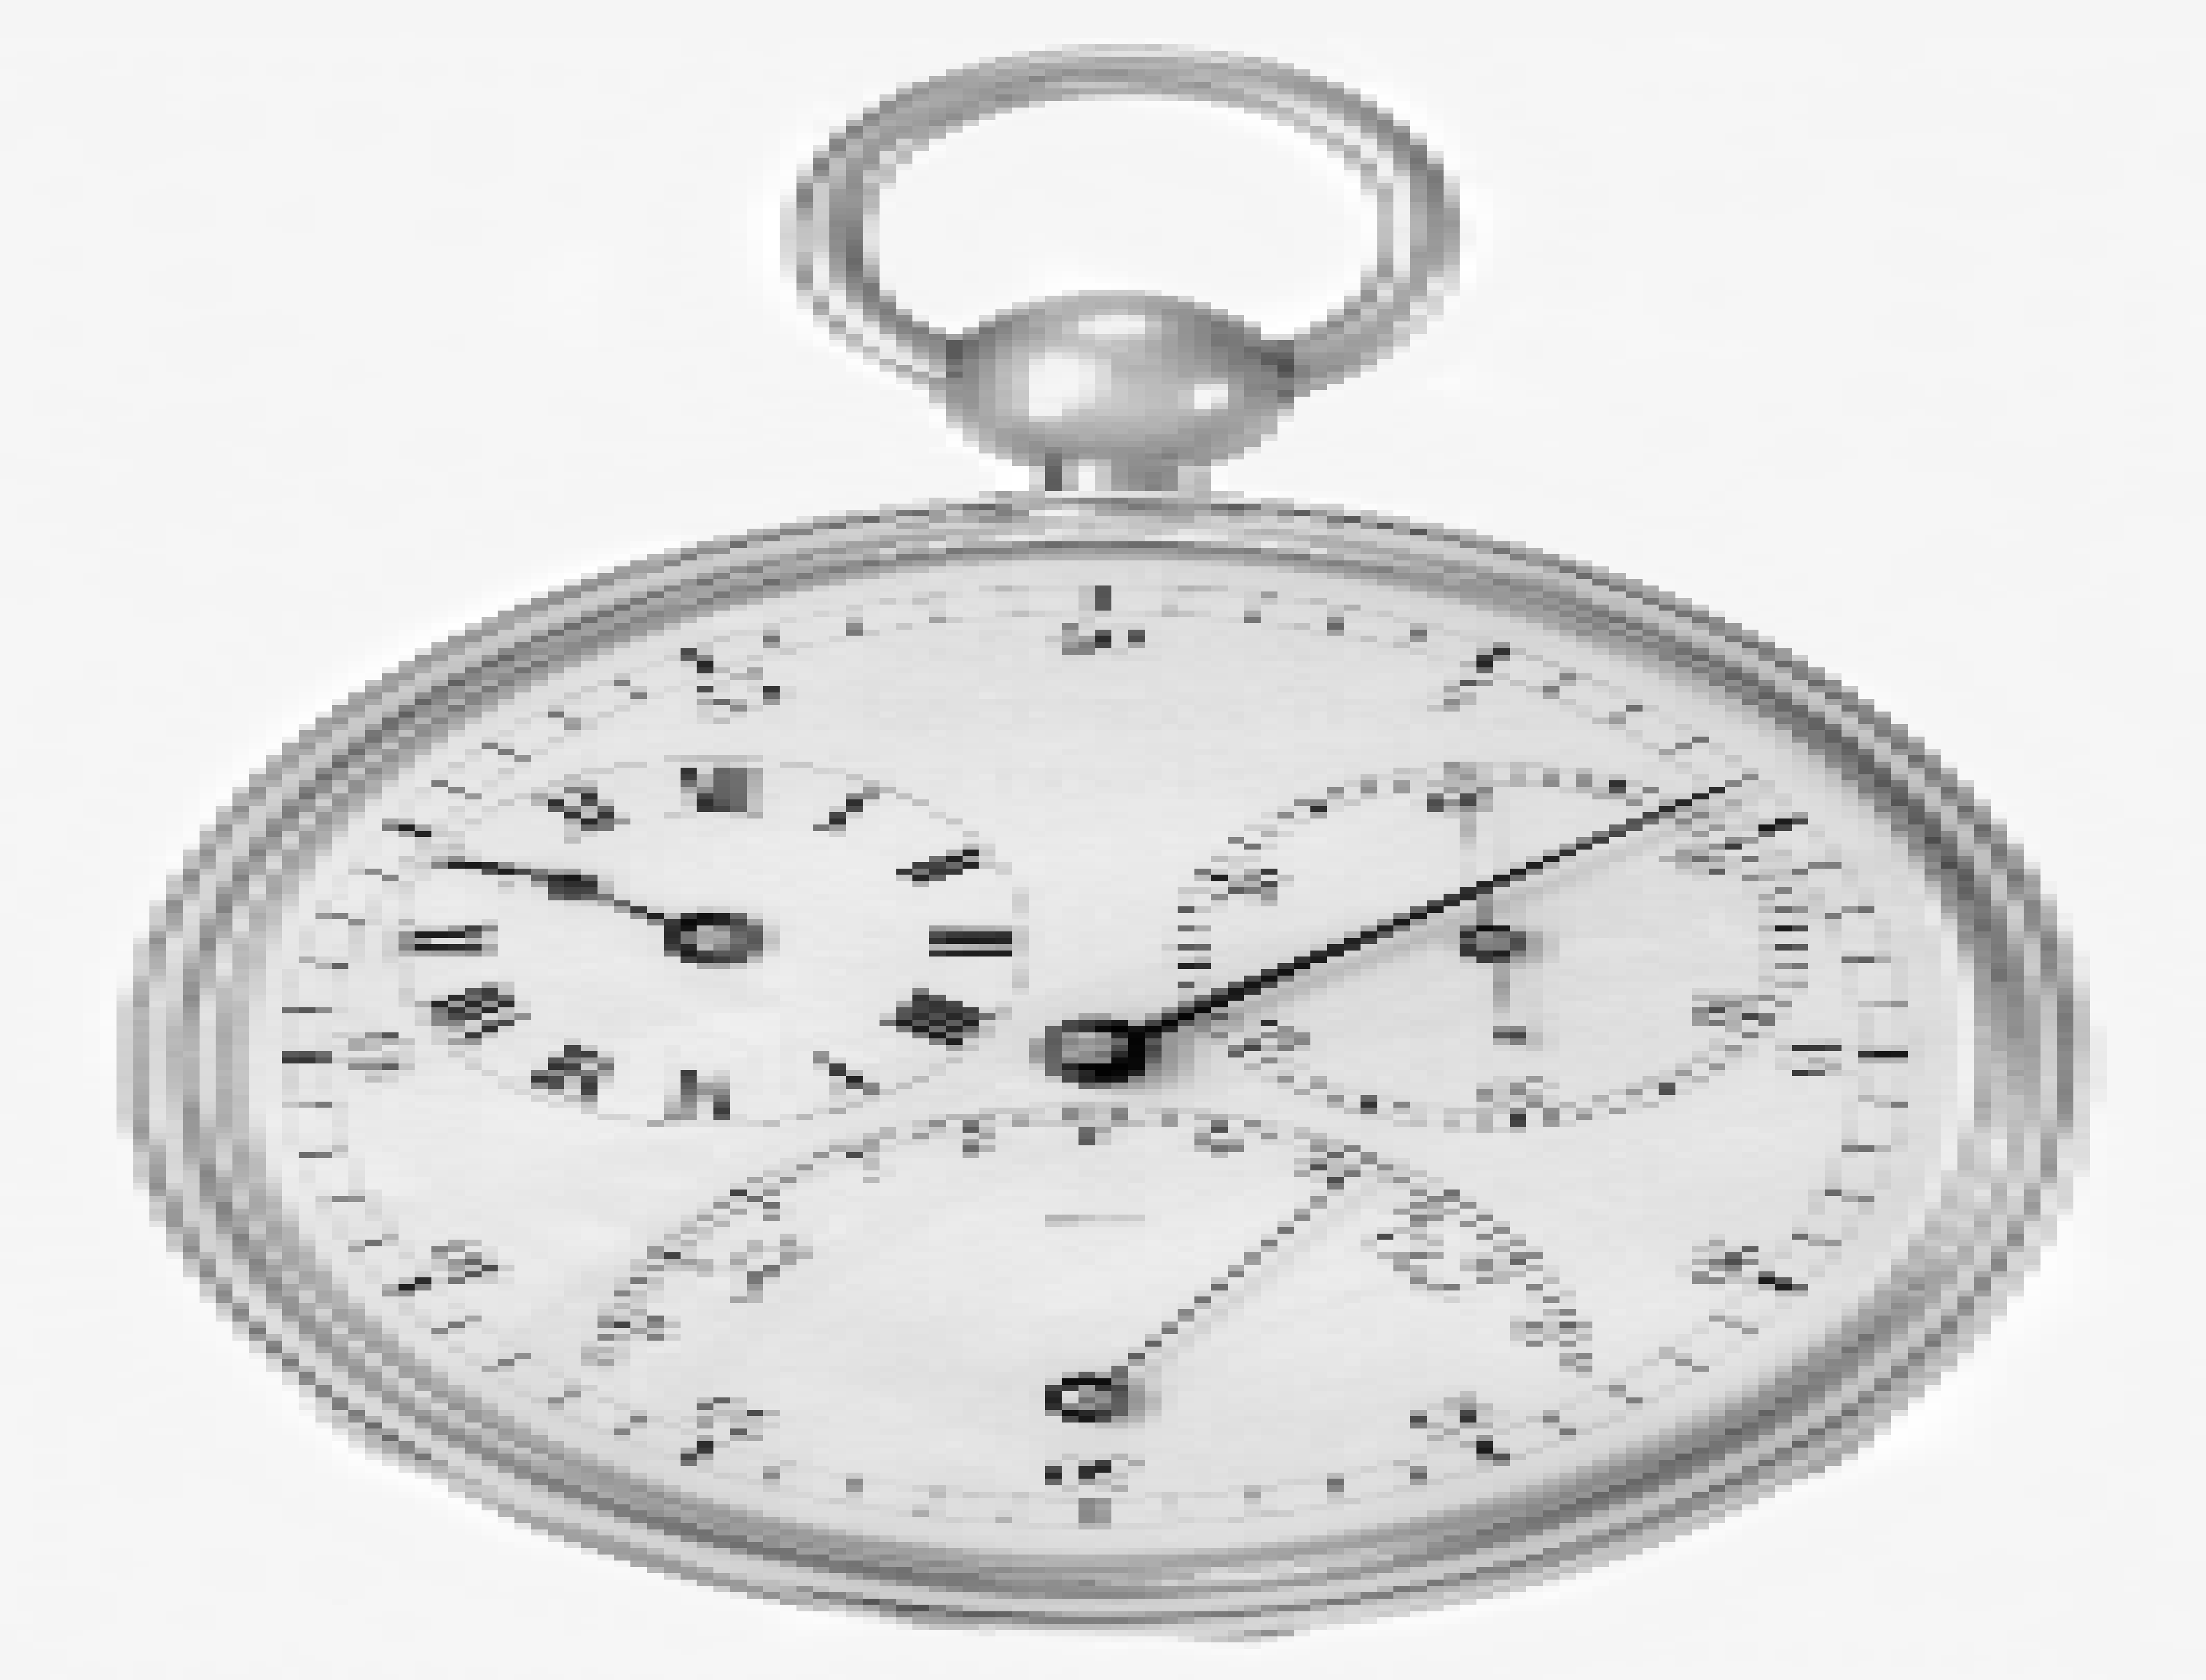

In [ ]:
def nearest_neighbors(image,new_width,new_height):
  image = np.array(image)
  height,width = image.shape[0:2]
  scale_height = new_height / height
  scale_width = new_width / width
  enlarged_image = np.zeros((new_height, new_width,3), dtype = image.dtype)
  for i in range(new_height):
    for j in range(new_width):
      old_i = int( i / scale_height)
      old_j = int( j / scale_width)
      enlarged_image[i,j] = image[old_i,old_j]
  return enlarged_image
enlarged_image = nearest_neighbors(resized_image,3692 ,2812)
cv2_imshow(enlarged_image)

#2. Bilinear Interpolation:
Now we will enlarge the resized image to the original size by the help of the Bilinear interpolation method.
1. Define a function bl_interpolation() which will take three arguments:

  1. original_image
  2. new_height
  3. new_width
2. Find the old width and height of the original image with the help of original_image.shape
3. Find a scale factor for the two coordinates x and y or width and height respectively in the manner:

  scale_width = old_width / new_width
  scale_height = old_height / new_height
4. Create a numpy array i.e zeros array having new_height and new_width for the enlarged_image.
5. Now to access in the enlarged_image array define 2 for loops for both coordinates respectively.
6. Mapp into the original_image array with the help of scaling factors

In [ ]:
import math
def bl_interpolation(original_image, new_width, new_height):
  old_height,old_width,c = original_image.shape
  scale_height = old_height / new_height
  scale_width = old_width / new_width
  enlarged_image = np.zeros((new_height, new_width, c), dtype = original_image.dtype)
  for i in range(new_height):
    for j in range(new_width):
      x = i * scale_height
      y = j * scale_width
      x_floor = math.floor(x)
      x_ceil = min(old_height - 1, math.ceil(x))
      y_floor = math.floor(y)
      y_ceil = min(old_width - 1, math.ceil(x))
      v1 = original_image[x_floor, y_floor, :]
      v2 = original_image[x_ceil, y_floor, :]
      v3 = original_image[x_floor, y_ceil, :]
      v4 = original_image[x_ceil, y_ceil, :]
      q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
      q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
      q = q1 * (y_ceil - y) + q2 * (y - y_floor)
      enlarged_image[i,j,:] = q
  return enlarged_image

enlarged_image =  bl_interpolation(resized_image,3692 ,2812)
cv2_imshow(enlarged_image)

NameError: ignored

#**ARITHMETIC OPERATIONS**
Arithmetic operations between two images f(x,y) and g(x,y) are denoted as;

    s(x,y) = f(x,y) + g(x,y)
    d(x,y) = f(x,y) - g(x,y)
    p(x,y) = f(x,y) * g(x,y)
    v(x,y) = f(x,y) / g(x,y)

#**Comparing images using subtraction**

Image subtraction is used routinely for enhancing differences between images. The intensity at any point in the difference image is proportional to the
magnitude of the numerical difference between the two images at that point. Therefore, we can analyze
which areas of the original image are affected the most when resolution is reduced.

(703, 923)


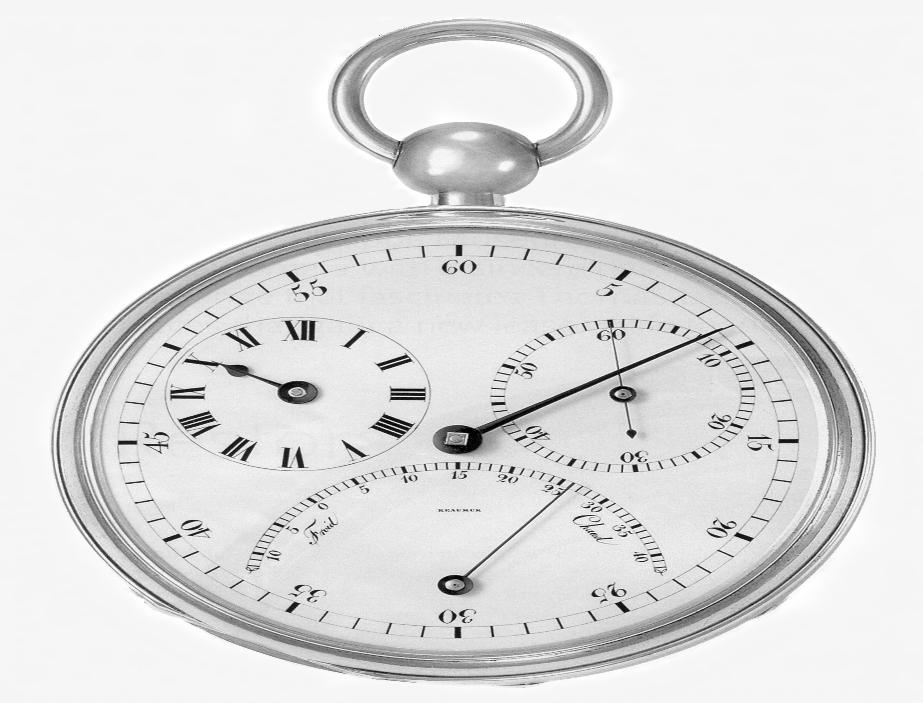

In [ ]:
# !pip install opencv-python
# !pip install Pillow
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
original_image = cv2.imread("/content/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
width = original_image.shape[0] // 2**2
height = original_image.shape[1] // 2**2
original_image = cv2.resize(original_image,(width,height))
print(original_image.shape)
cv2_imshow(original_image)


(703, 923)


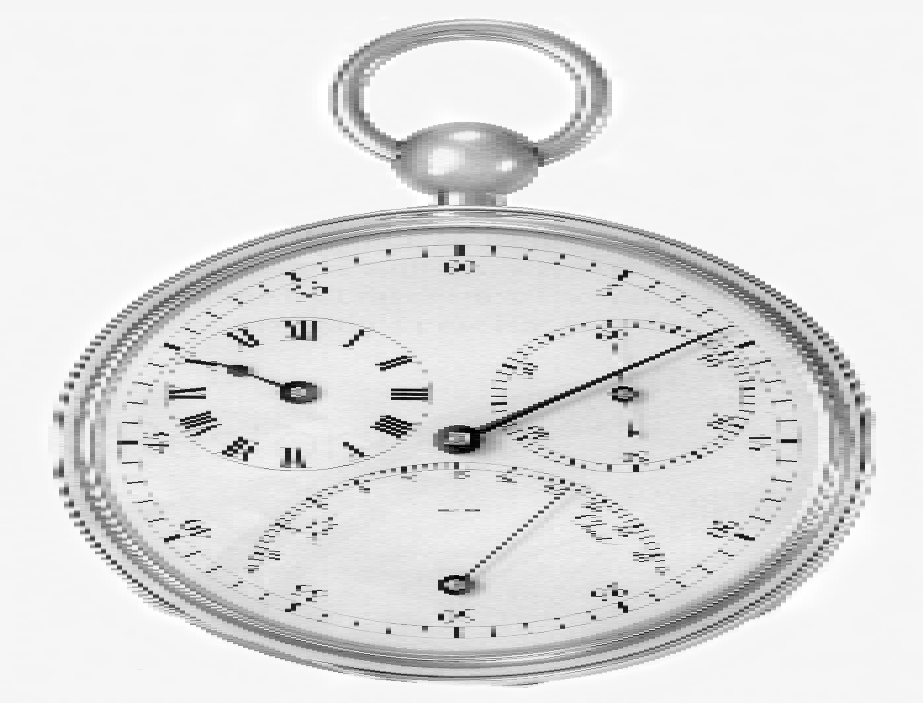

In [ ]:
new_width = original_image.shape[0] // 2**2
new_height = original_image.shape[1] // 2**2
reduced_image = cv2.resize(original_image, (new_width,height))
#cv2_imshow(reduced_image)
def nearest_neighbors(image,new_width,new_height):
  image = np.array(image)
  height,width = image.shape[0:2]
  scale_height = new_height / height
  scale_width = new_width / width
  enlarged_image = np.zeros((new_height, new_width,3), dtype = image.dtype)
  for i in range(new_height):
    for j in range(new_width):
      old_i = int( i / scale_height)
      old_j = int( j / scale_width)
      enlarged_image[i,j] = image[old_i,old_j]
  return enlarged_image
enlarged_image = nearest_neighbors(reduced_image,923 ,703)
reduced_image = cv2.cvtColor(enlarged_image, cv2.COLOR_BGR2GRAY)
print(reduced_image.shape)
cv2_imshow(reduced_image)

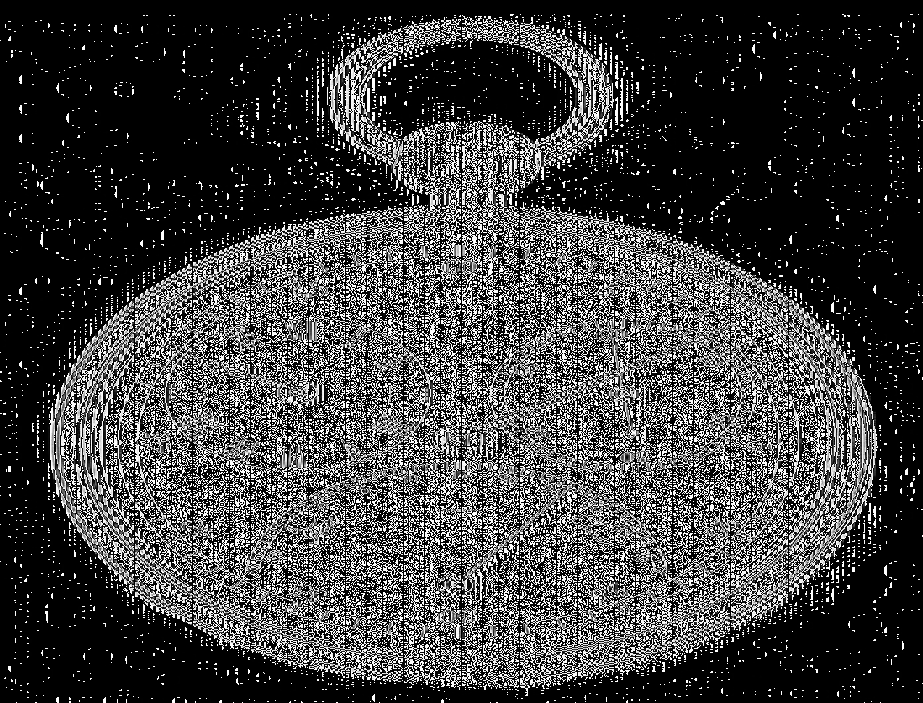

In [ ]:
sub_image = original_image - reduced_image
cv2_imshow(sub_image)

#**Set Operations On Images:**

**Complement of an Image (Negative of an image)**

Let a gray scale image elements be represented by a set A whose elements are tripplets of the form (x,y,z) where **x** and **y** are spatial coordinates and **z** is the intensity value at these coordinates. The Complement of A be defined as:

Ac = {(x, y, K-z) | (x, y, z) E A}

This is a set of pixels values which are subracted from a constant **K**. The constant is the maximum value in the image intensity ""2^k"" where **k** is the number of bits to represent the intesnity value(z).

As the gray scale image is 8-bit image then the **Negative** is the complement so we all have to do is to set the **K** = 255 in the set defined above;

Ac = {(x, y, 255-z) | (x, y, z) E A}



**The original Image:**

Text(0.5, 1.0, 'Original Image')

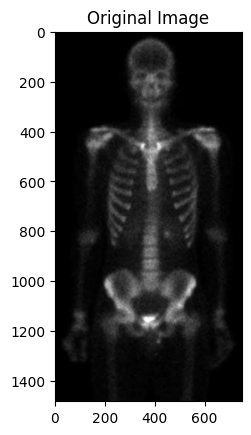

In [ ]:
import matplotlib.pyplot as plt
original_image = cv2.imread("//content/Fig0232(a)(partial_body_scan).tif")
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

**The negaitive or Complement of the original image:**

Text(0.5, 1.0, 'Negative Image')

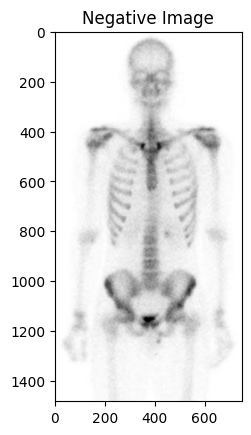

In [ ]:
negative_image = 255 - original_image
plt.subplot(1, 2, 1)
plt.imshow(negative_image, cmap='gray', vmin=0, vmax=255)
plt.title('Negative Image')

#**Union Of Images:**

The union of two grayscale set of images A and B with the same number of element is define as;

A U B = {max(a,b) | a E A, b E B}

max operation is applied to pairs of the corresponding elements. If A and B is are grayscale images of the same size, we see that their union is an array form from the max operation applied to the corresponding elemnts mean that it will select the maximum element in corresponding pairs of elements.

Let consider the same image of X rays we will create another image which will be 3 time the mean intensity of the original image. It means that;

- Firts find the mean intensity value of the original image.
- Then create another image which has all the element/ pixels equal to 3 times the mean intensity.
- Then find the maximum corresponding element from both original and 3 times intensity image.

**Original Image:**

Text(0.5, 1.0, 'Original Image')

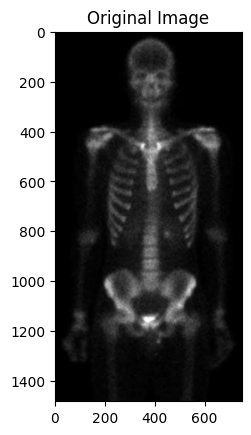

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

**3 times mean intensity Image:**

Text(0.5, 1.0, '3 times Image')

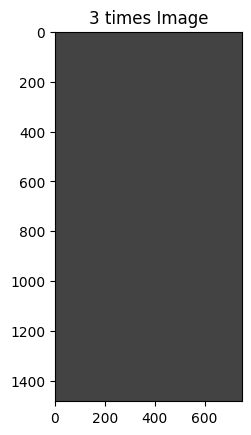

In [ ]:
mean_intensity = np.mean(original_image)
three_times_image = np.full_like(original_image, fill_value = 3 * mean_intensity, dtype = original_image.dtype)
plt.subplot(1, 2, 1)
plt.imshow(three_times_image, cmap='gray', vmin=0, vmax=255)
plt.title('3 times Image')

**Union of the Images:**

Text(0.5, 1.0, 'Union Image')

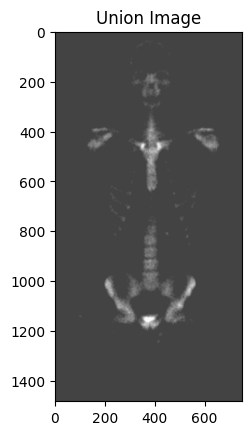

In [ ]:
union_image = np.maximum(original_image,three_times_image)
plt.subplot(1, 2, 1)
plt.imshow(union_image, cmap='gray', vmin=0, vmax=255)
plt.title('Union Image')

#**Neighbourhood Operation**


TypeError: ignored

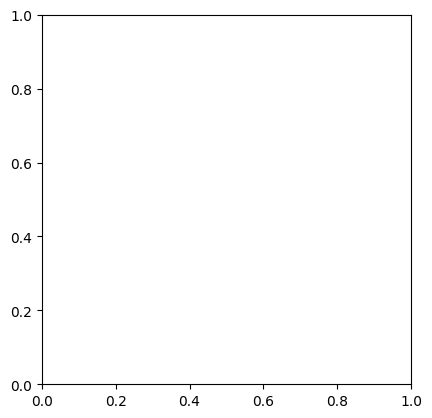

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
neighborhood_size = (5,5)
original_image = cv2.imread("/content/Fig0235(c)(kidney_original).tif")
plt.imshow(original_image)

<ipython-input-13-3d7ed149c5d9>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros_like(image, dtype=np.float)


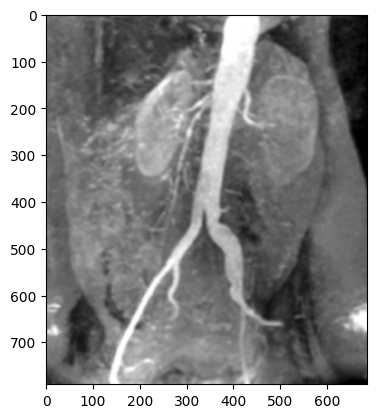

In [ ]:
def average_neighborhood(image, m, n):
    result = np.zeros_like(image, dtype=np.float)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Define neighborhood directly using array slicing
            neighborhood = image[max(0, i - m//2):min(image.shape[0], i + m//2 + 1),
                                 max(0, j - n//2):min(image.shape[1], j + n//2 + 1)]

            # Perform the neighborhood operation (average in this case)
            result[i, j] = np.mean(neighborhood)

    return result.astype(np.uint8)
processed_image = average_neighborhood(original_image, 5,5)
plt.imshow(processed_image)

#**Geometric Transformation**

**Image Rotation**

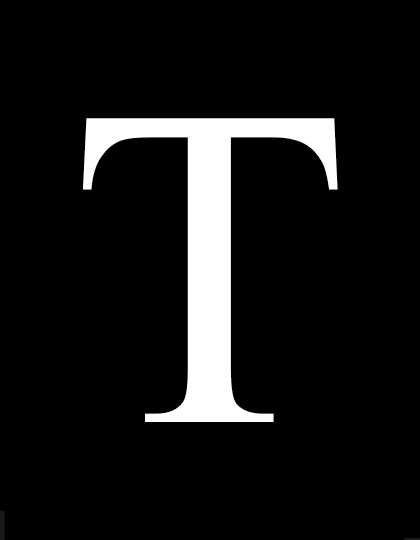

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
original_image = cv2.imread("/content/Fig0236(a)(letter_T).tif")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(original_image)

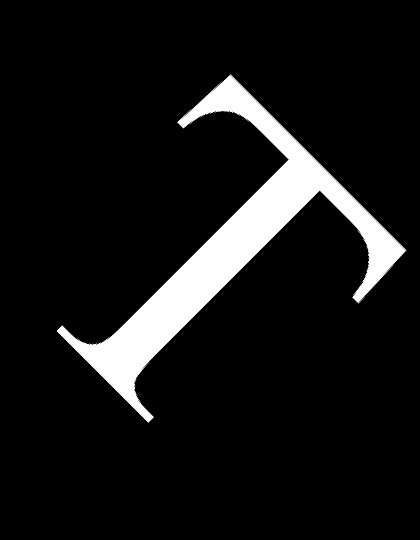

In [ ]:
from google.colab.patches import cv2_imshow
def rotate_image(image,rotaion_angle):
  rows,cols = image.shape[:2]
  angle_radians = np.radians(rotaion_angle)
  rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                             [np.sin(angle_radians), np.cos(angle_radians)]])
  center_x, center_y = rows // 2, cols // 2
  transformed_image = np.zeros_like(image)
  for x in range(rows):
    for y in range(cols):
      translated_coords = np.array([x - center_x, y - center_y])
      new_coords = np.dot(rotation_matrix, translated_coords)
      new_x, new_y = new_coords.astype(int) + np.array([center_x, center_y])
      if 0 <= new_x < rows and 0 <= new_y < cols:
        transformed_image[x,y] = image[new_x, new_y]
  return transformed_image
rotated_image = rotate_image(original_image,45)
cv2_imshow(rotated_image)